Будем работать с датасетом, содержащим сведения о 40 000 ресторанах Европы,
а модель, которую будем обучать, должна будет предсказывать рейтинг ресторана
по данным сайта TripAdvisor на основе имеющихся в датасете данных.

Первоначальная версия датасета состоит из десяти столбцов, содержащих следующую информацию:

- Restaurant_id — идентификационный номер ресторана / сети ресторанов;
- City — город, в котором находится ресторан;
- Cuisine Style — кухня или кухни, к которым можно отнести блюда, предлагаемые в ресторане;
- Ranking — место, которое занимает данный ресторан среди всех ресторанов своего города;
- Rating — рейтинг ресторана по данным TripAdvisor (именно это значение должна будет предсказывать модель);
- Price Range — диапазон цен в ресторане;
- Number of Reviews — количество отзывов о ресторане;
- Reviews — данные о двух отзывах, которые отображаются на сайте ресторана;
- URL_TA — URL страницы ресторана на TripAdvisor;
- ID_TA — идентификатор ресторана в базе данных TripAdvisor.

In [222]:
# import section
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns



In [223]:
#display.[max_categories, max_columns, max_colwidth, max_info_columns, max_info_rows, max_rows, min_rows]
pd.set_option('display.max_rows', 50) # показывать указанное количество строк
pd.set_option('display.max_columns', 50) # показывать указанное количество колонок

In [224]:
df = pd.read_csv('main_task.csv')

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [226]:
df.head()

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [227]:
#ToDo Очистка данных
# Ваш код по очистке данных и генерации новых признаков
# При необходимости добавьте ячейки

In [228]:
df[df['Number of Reviews'].isna()]

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
8,id_2690,Vienna,NaN,2692.0,4.0,NaN,NaN,"[[], []]",/Restaurant_Review-g190454-d12845029-Reviews-G...,d12845029
21,id_5844,Madrid,NaN,5847.0,4.0,NaN,NaN,"[[], []]",/Restaurant_Review-g187514-d10058810-Reviews-B...,d10058810
32,id_1327,Budapest,NaN,1328.0,5.0,NaN,NaN,"[['Absolutely amazing, tasty, fresh, cheap Ch....",/Restaurant_Review-g274887-d8791087-Reviews-Bu...,d8791087
102,id_1409,Budapest,"['French', 'European', 'Hungarian']",1410.0,5.0,NaN,NaN,"[[], []]",/Restaurant_Review-g274887-d13197631-Reviews-L...,d13197631
108,id_2047,Prague,"['Italian', 'Mediterranean']",2050.0,5.0,$$ - $$$,NaN,"[[], []]",/Restaurant_Review-g274707-d12243659-Reviews-T...,d12243659
...,...,...,...,...,...,...,...,...,...,...
39965,id_5720,Rome,NaN,5722.0,5.0,NaN,NaN,"[[], []]",/Restaurant_Review-g187791-d793376-Reviews-Wes...,d793376
39972,id_2009,Prague,"['Cafe', 'Delicatessen', 'Healthy', 'Wine Bar'...",2012.0,5.0,$,NaN,"[['Personal expirence'], ['10/27/2017']]",/Restaurant_Review-g274707-d12981295-Reviews-M...,d12981295
39986,id_7274,Madrid,NaN,7279.0,3.0,NaN,NaN,"[[], []]",/Restaurant_Review-g187514-d12182212-Reviews-C...,d12182212
39988,id_4968,Berlin,NaN,4970.0,4.0,NaN,NaN,"[[], []]",/Restaurant_Review-g187323-d7761701-Reviews-Ar...,d7761701


In [229]:
df_numberreviews = df.groupby('City')['Number of Reviews'].median()

In [230]:
def fill_number_review(row):
    if pd.isnull(row['Number of Reviews']):
        return df_numberreviews[row['City']]
    return row['Number of Reviews']

In [231]:
df['Number of Reviews'] = df.apply(fill_number_review, axis=1)

In [232]:
# Посчитаем в скольких гордах представлен ресторан
city_grp = pd.DataFrame(df.groupby('Restaurant_id')['City'].count())

In [233]:
city_grp.reset_index(inplace=True)

In [234]:
city_grp.columns = ['Restaurant_id', 'CityCnt']

In [235]:
df = df.merge(city_grp, how='left', on='Restaurant_id')

In [236]:
# Посчитаем сколько ресторонов в городе

In [237]:
RestCnt = pd.DataFrame(df.groupby('City')['ID_TA'].count())

In [238]:
RestCnt.reset_index(inplace=True)

In [239]:
RestCnt.columns = ['City', 'RestCnt']

In [240]:
df = df.merge(RestCnt, how='left', on='City')

In [241]:
df['City'].value_counts()

London        5757
Paris         4897
Madrid        3108
Barcelona     2734
Berlin        2155
Milan         2133
Rome          2078
Prague        1443
Lisbon        1300
Vienna        1166
Amsterdam     1086
Brussels      1060
Hamburg        949
Munich         893
Lyon           892
Stockholm      820
Budapest       816
Warsaw         727
Dublin         673
Copenhagen     659
Athens         628
Edinburgh      596
Zurich         538
Oporto         513
Geneva         481
Krakow         443
Oslo           385
Helsinki       376
Bratislava     301
Luxembourg     210
Ljubljana      183
Name: City, dtype: int64

In [242]:
np.percentile(list(df['City'].value_counts()),90)

2734.0

In [243]:
df['City'].value_counts().head(5)

London       5757
Paris        4897
Madrid       3108
Barcelona    2734
Berlin       2155
Name: City, dtype: int64

In [244]:
len(df['City'].value_counts())

31

In [245]:
df['Cuisine Style'].value_counts()

['Italian']                                                                                                                    1032
['French']                                                                                                                      805
['Spanish']                                                                                                                     695
['French', 'European']                                                                                                          405
['Cafe']                                                                                                                        403
                                                                                                                               ... 
['Bar', 'Cafe', 'Pub', 'Wine Bar', 'Street Food']                                                                                 1
['Italian', 'International', 'Mediterranean', 'Vegan Options', 'Vegetarian F

In [246]:
df['Price Range'].value_counts()

$$ - $$$    18412
$            6279
$$$$         1423
Name: Price Range, dtype: int64

In [247]:
# Преобразуем ценовой сегмент в ординарный тип
prcrng = {'$':'1', '$$ - $$$':'2', '$$$$':'3'}

In [248]:
df['PriceRNG'] = df['Price Range'].map(prcrng)

In [249]:
# Сколько ресторанов относятся к среднему ценовому сегменту?
len(df[df['Price Range']=='$$ - $$$'])

18412

In [250]:
# Заполним пропуски в типах кохонь
df['Cuisine Style'].fillna('None', inplace=True)

In [251]:
# Создадим столбец со списком из типов кухонь
df['CS'] = df['Cuisine Style'].apply(lambda style: ast.literal_eval(style))

In [252]:
# Взорвем, что бы посчитать количество типов кухонь и найти кухню, представленную в наибольшем кол-ве ресторанов
df_explode = df.explode('CS')

In [253]:
df_explode

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,CityCnt,RestCnt,PriceRNG,CS
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,3,4897,2,European
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,3,4897,2,French
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,3,4897,2,International
1,id_1535,Stockholm,None,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,10,820,NaN,None
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,8,5757,3,Japanese
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,4.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,8,727,2,European
39998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,4.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,8,727,2,Eastern European
39998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,4.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,8,727,2,Central European
39998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,4.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,8,727,2,Vegetarian Friendly


In [254]:
df_explode['CS'].value_counts()

Vegetarian Friendly    11189
European               10060
Mediterranean           6277
Italian                 5964
Vegan Options           4486
                       ...  
Burmese                    1
Latvian                    1
Salvadoran                 1
Xinjiang                   1
Yunnan                     1
Name: CS, Length: 125, dtype: int64

In [255]:
np.percentile(list(df_explode['CS'].value_counts()),90)

2077.0000000000055

In [256]:
df_explode['CS'].value_counts().head(15)

Vegetarian Friendly    11189
European               10060
Mediterranean           6277
Italian                 5964
Vegan Options           4486
Gluten Free Options     4113
Bar                     3297
French                  3190
Asian                   3011
Pizza                   2849
Spanish                 2798
Pub                     2449
Cafe                    2325
Fast Food               1705
British                 1595
Name: CS, dtype: int64

In [257]:
# Создадим столбец, с колиством кухонь в ресторане
df['CS_Sum'] = df['CS'].str.len()


In [258]:
#DUMMY переменные

In [259]:
#Города

In [260]:
dummy_city = pd.get_dummies(df['City'])

In [261]:
df = pd.concat([df, dummy_city], axis=1)

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 39999
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      40000 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  40000 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
 10  CityCnt            40000 non-null  int64  
 11  RestCnt            40000 non-null  int64  
 12  PriceRNG           26114 non-null  object 
 13  CS                 30717 non-null  object 
 14  CS_Sum             30717 non-null  float64
 15  Amsterdam          40000 non-null  uint8  
 16  Athens             400

In [263]:
#Кухни
df = df.join(pd.get_dummies(df_explode['CS']).sum(level=0))

In [264]:
# Если не была указана кухня, то считаем , что одна точно есть
df['CS_Sum'].fillna(1, inplace=True)

In [265]:
# посчитаем среднее количество кухонь в ресторане
round(df['CS_Sum'].mean(),1)

2.6

In [266]:
# Заполним пропуски в отзывах
#df['Reviews'].fillna('None', inplace=True)
df.Reviews.isna().sum()

0

In [267]:
# Есть строки, где в списке встречается 'nan', заменим его
df_nan = df[df['Reviews'].str.contains('nan')].Reviews

In [268]:
df['Reviews'][5315] = df['Reviews'][5315].replace('nan', "''")

<ipython-input-268-c2af0e4a00f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Reviews'][5315] = df['Reviews'][5315].replace('nan', "''")


In [269]:
df['Reviews'][22958] = df['Reviews'][22958].replace('nan', "''")


<ipython-input-269-671022b22779>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Reviews'][22958] = df['Reviews'][22958].replace('nan', "''")


In [270]:
# Преобразуем в список
df['RevList'] = df['Reviews'].apply(lambda rev: ast.literal_eval(rev))

In [271]:
# Достанем отзывы
df['Rev'] = df['RevList'].apply(lambda rev: rev[0])

In [272]:
# Достанем даты отзывово
df['Date'] = df['RevList'].apply(lambda rev: rev[1])

In [273]:
# Посмотрим на длины списков
df['RevLen'] = df['Rev'].apply(lambda rev: len(rev))

In [274]:
df['DateLen'] = df['Date'].apply(lambda dat: len(dat))

In [275]:
df['RevLen'].value_counts()

2    28973
0     6471
1     4556
Name: RevLen, dtype: int64

In [276]:
df['DateLen'].value_counts()

2    28973
0     6471
1     4556
Name: DateLen, dtype: int64

In [277]:
# Есть пустые списки - нет отзывов
# Есть список тольколь с одним отзывом
# Есть список с двумя отзывами

In [278]:
df['Dat1'] = df['Date'].apply(lambda dat: pd.to_datetime(dat[0]) if len(dat)>0 else np.nan)

In [279]:
df['Dat2'] = df['Date'].apply(lambda dat: pd.to_datetime(dat[1]) if len(dat)>1 else np.nan)

In [280]:
# Псмотрим на дату самого свежего отзыва
print(df['Dat1'].max()) , print(df['Dat2'].max())
print(df['Dat1'].mean()) , print(df['Dat2'].mean())
# На дату самого старого
print(df['Dat1'].min()) , print(df['Dat2'].min())
print(df['Dat1'].mean()) , print(df['Dat2'].mean())


2018-02-26 00:00:00
2018-02-26 00:00:00
2017-05-05 00:27:42.083569408
2017-02-24 18:15:22.210333952
2004-04-21 00:00:00
2007-11-14 00:00:00
2017-05-05 00:27:42.083569408
2017-02-24 18:15:22.210333952


(None, None)

In [2]:
#Анализ тональности
! pip install -U textblob

     |████████████████████████████████| 636 kB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.4 MB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 82 kB 1.4 MB/s eta 0:00:011
     |████████████████████████████████| 284 kB 2.4 MB/s eta 0:00:01
  Created wheel for nltk: filename=nltk-3.5-py3-none-any.whl size=1434675 sha256=04ec0089d29ab4316b4f417bb0e1f5e01a12aeaf3a9d20aab53a180361a5dbc9
  Stored in directory: /Users/serpent/Library/Caches/pip/wheels/13/ae/bb/5e2a232ebaa1d2f38dd5f587e9fc4cf6ccb12758d14dac14d8
Successfully built nltk


In [3]:
! python -m textblob.download_corpora

[nltk_data] Downloading package brown to /Users/serpent/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /Users/serpent/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /Users/serpent/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/serpent/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to
[nltk_data]     /Users/serpent/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/serpent/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [4]:
from textblob import TextBlob


In [6]:
sentence = '''The platform provides universal access to the world's best education, partnering with top universities and organizations to offer courses online.'''

analysisPol = TextBlob(sentence).polarity
print(analysisPol)

0.5


In [281]:
# Посмотрим на разницу дат между публикацией отзывов
df['DatInterval'] = df['Dat1'] - df['Dat2']

In [204]:
df['DatInterval'].max()

Timedelta('3207 days 00:00:00')

In [205]:
df

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,CityCnt,RestCnt,PriceRNG,CS,CS_Sum,Amsterdam,Athens,Barcelona,Berlin,Bratislava,Brussels,Budapest,Copenhagen,Dublin,Edinburgh,...,Swedish,Swiss,Taiwanese,Thai,Tibetan,Tunisian,Turkish,Ukrainian,Uzbek,Vegan Options,Vegetarian Friendly,Venezuelan,Vietnamese,Welsh,Wine Bar,Xinjiang,Yunnan,RevList,Rev,Date,RevLen,DateLen,Dat1,Dat2,DatInterval
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,3,4897,2,"[European, French, International]",3.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[[Good food at your doorstep, A good hotel res...","[Good food at your doorstep, A good hotel rest...","[12/31/2017, 11/20/2017]",2,2,2017-12-31,2017-11-20,41 days
1,id_1535,Stockholm,None,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,10,820,NaN,None,1.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[[Unique cuisine, Delicious Nepalese food], [0...","[Unique cuisine, Delicious Nepalese food]","[07/06/2017, 06/19/2016]",2,2,2017-07-06,2016-06-19,382 days
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,8,5757,3,"[Japanese, Sushi, Asian, Grill, Vegetarian Fri...",7.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,"[[Catch up with friends, Not exceptional], [01...","[Catch up with friends, Not exceptional]","[01/08/2018, 01/06/2018]",2,2,2018-01-08,2018-01-06,2 days
3,id_3456,Berlin,None,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,4,2155,NaN,None,1.0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[[], []]",[],[],0,0,NaT,NaT,NaT
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,14,893,2,"[German, Central European, Vegetarian Friendly]",3.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,"[[Best place to try a Bavarian food, Nice buil...","[Best place to try a Bavarian food, Nice build...","[11/18/2017, 02/19/2017]",2,2,2017-11-18,2017-02-19,272 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,4.5,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,14,2133,2,"[Italian, Vegetarian Friendly, Vegan Options, ...",4.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,"[[The real Italian experience!, Wonderful food...","[The real Italian experience!, Wonderful food,...","[12/16/2017, 11/12/2017]",2,2,2017-12-16,2017-11-12,34 days
39996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,3.5,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,2,4897,2,"[French, American, Bar, European, Vegetarian F...",5.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,"[[Parisian atmosphere, Bit pricey but interest...","[Parisian atmosphere, Bit pricey but interesti...","[12/21/2017, 12/12/2017]",2,2,2017-12-21,2017-12-12,9 days
39997,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,4.5,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,10,820,NaN,"[Japanese, Sushi]",2.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[[Good by swedish standards, A hidden je

Timestamp('2018-02-26 00:00:00')

In [284]:
import datetime

In [288]:
df['Dat2'].max() - datetime.datetime.now()

Timedelta('-1101 days +12:05:16.109198')

In [283]:
dt.now()

NameError: name 'dt' is not defined

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 39999
Columns: 179 entries, Restaurant_id to DatInterval
dtypes: datetime64[ns](2), float64(4), int64(4), object(12), timedelta64[ns](1), uint8(156)
memory usage: 14.3+ MB


In [207]:
# Преобразуем типы
df = df.apply(pd.to_numeric, errors='ignore')

In [208]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 39999
Columns: 179 entries, Restaurant_id to DatInterval
dtypes: float64(5), int64(7), object(11), uint8(156)
memory usage: 14.3+ MB


In [209]:
# Удаление колокон с типом Object
for column in df.columns:
    if df[column].dtype == 'O' :
        print ('Удаление колонки:',column)
        df.drop(columns=column, inplace=True)

Удаление колонки: Restaurant_id
Удаление колонки: City
Удаление колонки: Cuisine Style
Удаление колонки: Price Range
Удаление колонки: Reviews
Удаление колонки: URL_TA
Удаление колонки: ID_TA
Удаление колонки: CS
Удаление колонки: RevList
Удаление колонки: Rev
Удаление колонки: Date


In [210]:
# Заполнение всех пропусков 0
df.fillna(0, inplace=True)

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 39999
Columns: 168 entries, Ranking to DatInterval
dtypes: float64(5), int64(7), uint8(156)
memory usage: 10.9 MB


# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [212]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
#X = df.drop(['Restaurant_id', 'Rating'], axis = 1)
X = df.drop(['Rating'], axis = 1)
y = df['Rating']

In [213]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split


In [214]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Создаём, обучаем и тестируем модель

In [215]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [216]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)


In [217]:
# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)


RandomForestRegressor()

In [218]:
# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)


In [219]:
# Округлим кратно .5
y_pred = np.around(y_pred*2)/2


In [220]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.1788


<AxesSubplot:>

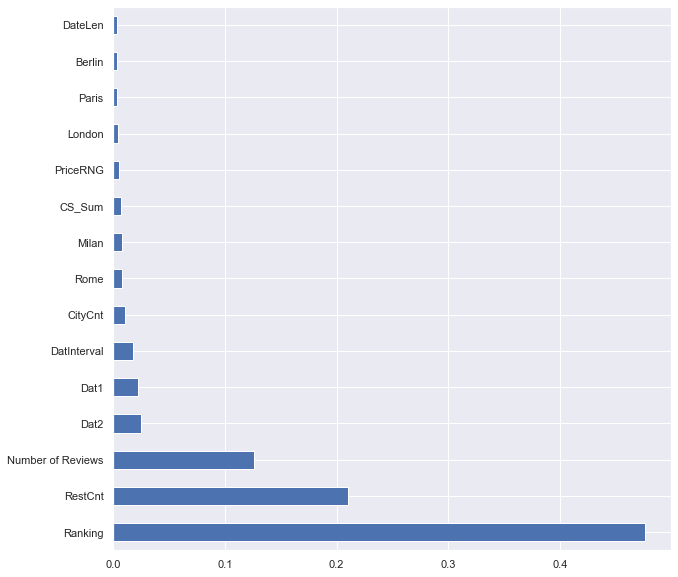

In [221]:
# Взял из BaseLine
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
sns.set()
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(regr.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')